PRACTICAL 8 :  To enhance low-resolution images using GAN-based super-resolution.


# **Step 1 — Enable GPU**

Runtime → Change runtime type → GPU

# **Step 2 — Install Dependencies**

In [ ]:
!pip install tensorflow tensorflow_hub pillow matplotlib


# **Step 3 — Upload Your Low-Res Image**

In [ ]:
from google.colab import files
from PIL import Image

uploaded = files.upload()
input_image_path = list(uploaded.keys())[0]
print("✅ Uploaded:", input_image_path)

img = Image.open(input_image_path).convert("RGB")
img.save("input_lr.png")


Saving lowresImage1.webp to lowresImage1.webp
✅ Uploaded: lowresImage1.webp


# **Step 4 — Load ESRGAN & Run Super-Resolution**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

# Load ESRGAN Model
print("⏳ Loading ESRGAN model...")
esrgan = hub.load("https://tfhub.dev/captain-pool/esrgan-tf2/1")
print("✅ ESRGAN Loaded!")

# Pre-process
lr = np.array(Image.open("input_lr.png")).astype(np.float32) / 255.0
lr = tf.expand_dims(lr, 0)

# Run ESRGAN
print("⏳ Enhancing image...")
sr = esrgan(lr)
sr = tf.squeeze(sr, axis=0)

# Convert back to image format
sr = tf.clip_by_value(sr, 0, 1).numpy()
sr = (sr * 255).astype(np.uint8)
Image.fromarray(sr).save("output_sr.png")

print("✅ Super-Resolution Done & Saved as output_sr.png")


⏳ Loading ESRGAN model...
✅ ESRGAN Loaded!
⏳ Enhancing image...
✅ Super-Resolution Done & Saved as output_sr.png


# **Step 5 — Show Input vs Output Images Side-by-Side**

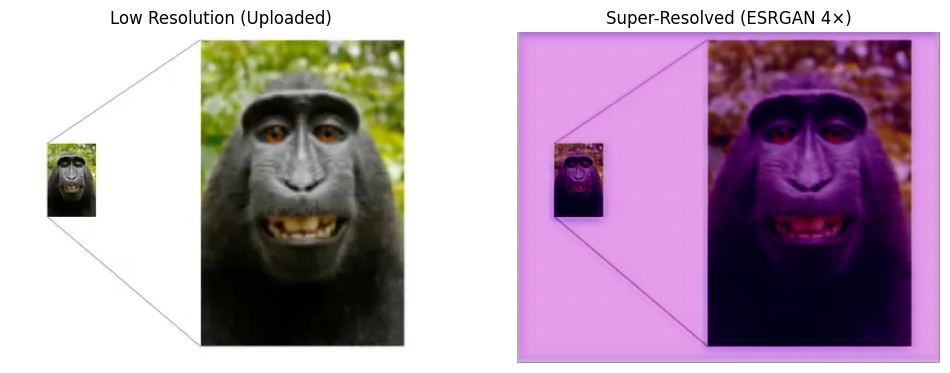

In [ ]:
import matplotlib.pyplot as plt

lr_img = Image.open("input_lr.png")
sr_img = Image.open("output_sr.png")

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Low Resolution (Uploaded)")
plt.imshow(lr_img)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Super-Resolved (ESRGAN 4×)")
plt.imshow(sr_img)
plt.axis('off')

plt.show()


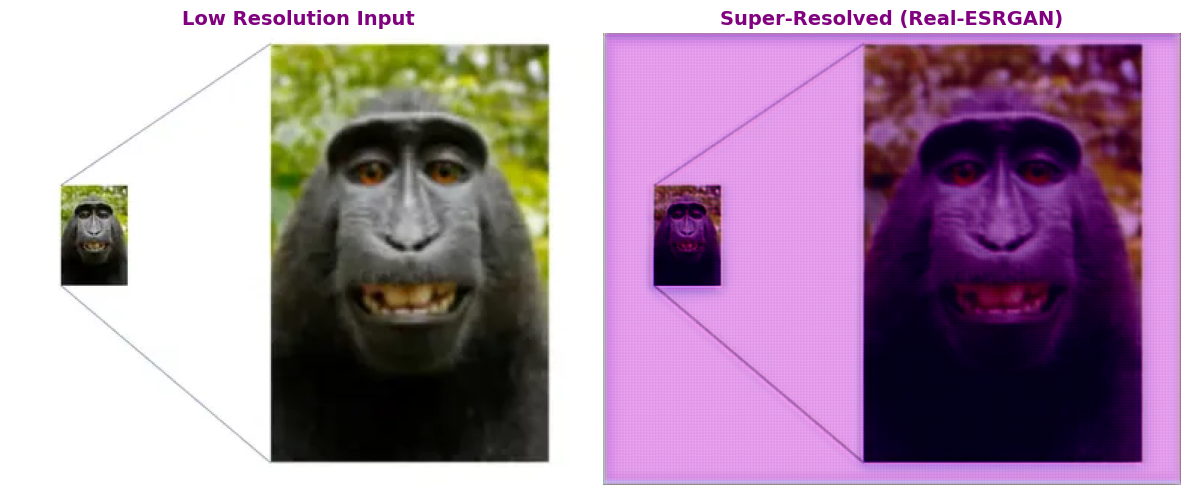

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

lr_img = Image.open("input_lr.png")
sr_img = Image.open("output_sr.png")

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Low Resolution Input", color='purple', fontsize=14, fontweight='bold')
plt.imshow(lr_img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Super-Resolved (Real-ESRGAN)", color='purple', fontsize=14, fontweight='bold')
plt.imshow(sr_img)
plt.axis("off")

plt.tight_layout()
plt.show()
